<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
# Load dataset
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Describe data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


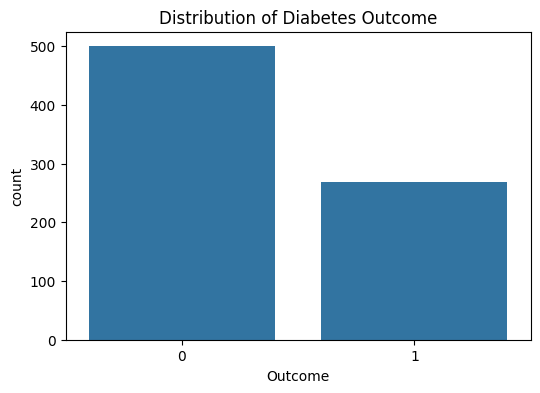

In [5]:
# Distribution of Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

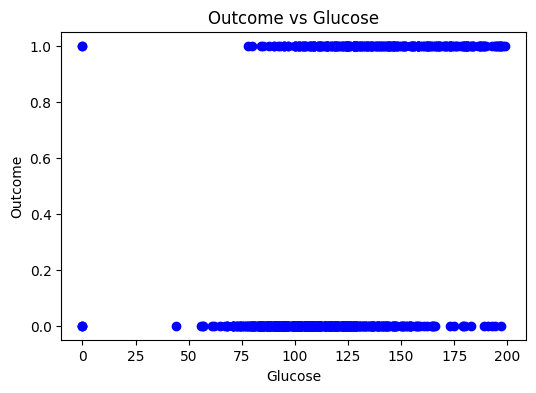

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(data['Glucose'], data['Outcome'], color='blue')
plt.title('Outcome vs Glucose')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

In [7]:
# Independent and dependent variables
X = data[['Glucose']]  # Independent
y = data['Outcome']    # Dependent

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

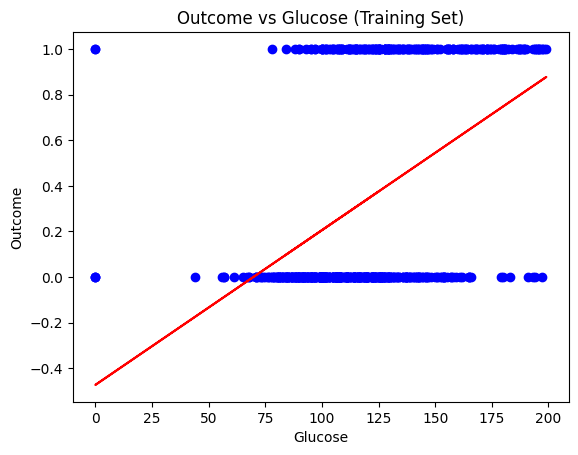

In [9]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred_train, color='red')
plt.title('Outcome vs Glucose (Training Set)')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

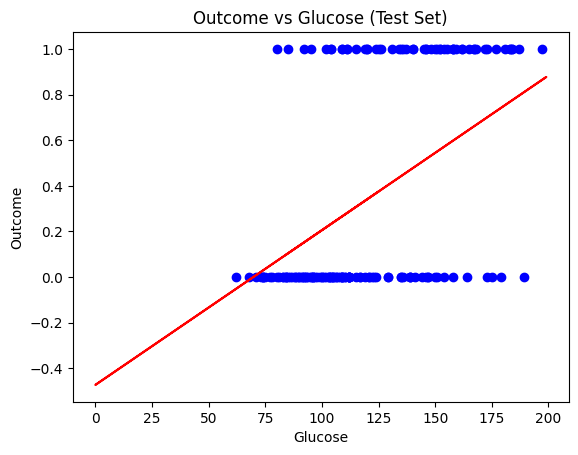

In [10]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, y_pred_train, color='red')  # Regression line from training
plt.title('Outcome vs Glucose (Test Set)')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

In [12]:
#Simple Regression Coefficients

print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')
print(f'R² Score (Test): {r2_score(y_test, y_pred_test)}')
print(f'Mean Squared Error (Test): {mean_squared_error(y_test, y_pred_test)}')

Coefficient: [0.00678263]
Intercept: -0.47281007618874077
R² Score (Test): 0.25463232826956206
Mean Squared Error (Test): 0.17113033279525355


In [13]:
#Multiple Linear Regression

# Use multiple predictors
X_multi = data[['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin',
                'Pregnancies', 'DiabetesPedigreeFunction', 'SkinThickness']]

# Train/test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predict
y_pred_multi = multi_model.predict(X_test_m)

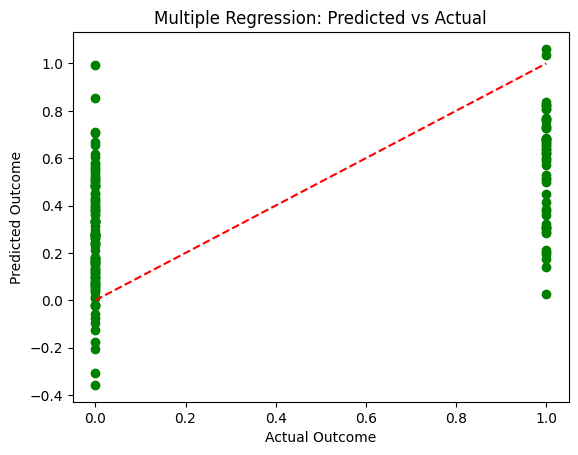

In [14]:
plt.scatter(y_test_m, y_pred_multi, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Multiple Regression: Predicted vs Actual')
plt.show()

In [15]:
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)
print("R² Score (Test):", r2_score(y_test_m, y_pred_multi))
print("MSE (Test):", mean_squared_error(y_test_m, y_pred_multi))

Intercept: -0.9487546338208523
Coefficients: [ 0.00563353  0.01503864  0.00646027 -0.00228103 -0.00027815  0.01046818
  0.11126264  0.00053209]
R² Score (Test): 0.25500281176741757
MSE (Test): 0.17104527280850101
